# Calculating radial distribution functions

Radial distribution functions can be calculated from one or more `pymatgen` `Structure` objects by using the `vasppy.rdf.RadialDistributionFunction` class. 

In [1]:
# Create a pymatgen Structure for NaCl
from pymatgen import Structure, Lattice

# Create a pymatgen Structure for NaCl
from pymatgen import Structure, Lattice

a = 5.6402 # NaCl lattice parameter
lattice = Lattice.from_parameters(a, a, a, 90.0, 90.0, 90.0)
lattice

Lattice
    abc : 5.6402 5.6402 5.6402
 angles : 90.0 90.0 90.0
 volume : 179.42523043680802
      A : 5.6402 0.0 3.453626438275451e-16
      B : -3.453626438275451e-16 5.6402 3.453626438275451e-16
      C : 0.0 0.0 5.6402

In [2]:
structure = Structure.from_spacegroup(sg='Fm-3m', lattice=lattice,
                          species=['Na', 'Cl'],
                          coords=[[0,0,0], [0.5, 0, 0]])
structure

Structure Summary
Lattice
    abc : 5.6402 5.6402 5.6402
 angles : 90.0 90.0 90.0
 volume : 179.42523043680802
      A : 5.6402 0.0 3.453626438275451e-16
      B : -3.453626438275451e-16 5.6402 3.453626438275451e-16
      C : 0.0 0.0 5.6402
PeriodicSite: Na (0.0000, 0.0000, 0.0000) [0.0000, 0.0000, 0.0000]
PeriodicSite: Na (-0.0000, 2.8201, 2.8201) [0.0000, 0.5000, 0.5000]
PeriodicSite: Na (2.8201, 0.0000, 2.8201) [0.5000, 0.0000, 0.5000]
PeriodicSite: Na (2.8201, 2.8201, 0.0000) [0.5000, 0.5000, 0.0000]
PeriodicSite: Cl (2.8201, 0.0000, 0.0000) [0.5000, 0.0000, 0.0000]
PeriodicSite: Cl (-0.0000, 2.8201, 0.0000) [0.0000, 0.5000, 0.0000]
PeriodicSite: Cl (0.0000, 0.0000, 2.8201) [0.0000, 0.0000, 0.5000]
PeriodicSite: Cl (2.8201, 2.8201, 2.8201) [0.5000, 0.5000, 0.5000]

In [3]:
from vasppy.rdf import RadialDistributionFunction

The default required arguments for creating a `RadialDistributionFunction` object are a list of `pymatgen` `Structure` objects, and the numerical indices of the atoms (or `Site` objects) that we want to compute the rdf between.

In [4]:
indices_na = [i for i, site in enumerate(structure) if site.species_string is 'Na']
indices_cl = [i for i, site in enumerate(structure) if site.species_string is 'Cl']
print(indices_na)
print(indices_cl)

[0, 1, 2, 3]
[4, 5, 6, 7]


In [5]:
rdf_nana = RadialDistributionFunction(structures=[structure], 
                                      indices_i=indices_na)
rdf_clcl = RadialDistributionFunction(structures=[structure], 
                                      indices_i=indices_cl)

To compute a rdf between different species, we need to pass both `indices_i` and `indices_j`.

In [6]:
rdf_nacl = RadialDistributionFunction(structures=[structure], 
                                      indices_i=indices_na, indices_j=indices_cl)

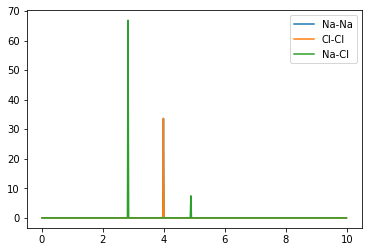

In [9]:
import matplotlib.pyplot as plt

plt.plot(rdf_nana.r, rdf_nana.rdf, label='Na-Na')
plt.plot(rdf_clcl.r, rdf_clcl.rdf, label='Cl-Cl')
plt.plot(rdf_nacl.r, rdf_nacl.rdf, label='Na-Cl')
plt.legend()
plt.show()

The Na and Cl sublattices are equivalent, so the Na–Na and Cl–Cl rdfs sit on top of each other.

A smeared rdf can be produced using the `smeared_rdf()` method, which applies a Gaussian kernel to the raw rdf data. The `smeared_rdf()` method takes on optional argument `sigma`, which can be used to set the width of the Gaussian (default = 0.1)

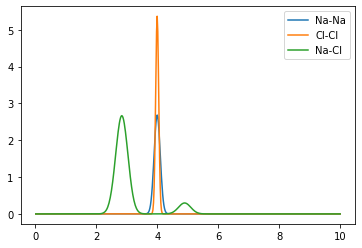

In [8]:
plt.plot(rdf_nana.r, rdf_nana.smeared_rdf(), label='Na-Na') # default smearing of 0.1
plt.plot(rdf_clcl.r, rdf_clcl.smeared_rdf(sigma=0.050), label='Cl-Cl')
plt.plot(rdf_nacl.r, rdf_nacl.smeared_rdf(sigma=0.2), label='Na-Cl')
plt.legend()
plt.show()